In [27]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
df = pd.read_csv("C:\\Users\\juyeo\\Desktop\\GNSS_DATA\\60s_results\\HOMI_merged_Q1.csv")
df_rms = pd.read_csv("C:\\Users\\juyeo\\Desktop\\GNSS_DATA\\_ECEF\\HOMI_ecef_merged.csv")

In [28]:
def ecef2enu(x, y, z, lat, long, h, xr, yr, zr) :
    pi = math.radians(lat)       #degree 단위를 radian로 변경
    lamb = math.radians(long)
    
    RMatrix = np.matrix([[-math.sin(lamb), math.cos(lamb), 0],
                         [-math.sin(pi)*math.cos(lamb), -math.sin(pi)*math.sin(lamb), math.cos(pi)], 
                         [math.cos(pi)*math.cos(lamb), math.cos(pi)*math.sin(lamb), math.sin(pi)]])
    
    Matrix = np.array([[x-xr], [y-yr], [z-zr]])
    enu = np.matmul(RMatrix, Matrix)
    return enu.flatten()

In [29]:
TEGN = np.array([-3241051.567, 4030771.731, 3719838.489])
true = np.array([-3211712.129, 4026954.298, 3749223.33, 36.23347936, 128.57423969, 174.97])
true_enu = ecef2enu(true[0],true[1],true[2],true[3],true[4],true[5],TEGN[0],TEGN[1],TEGN[2])
print(true_enu)
df['true_e'] = true_enu[0,0]
df['true_n'] = true_enu[0,1]
df['true_u'] = true_enu[0,2]

[[-20557.32179642  36279.45302829    205.19743396]]


In [30]:
def fig_enu(df, y1) :
    x = pd.to_datetime(df["GPST"])
    y = df[y1].values.reshape(-1, 1)
    lm = linear_model.LinearRegression()
    model = lm.fit(x.values.reshape(-1, 1), y)
    predictions = lm.predict(x.values.astype(float).reshape(-1, 1))
    f, ax = plt.subplots(1,1)
    
    ax.scatter(x, y, label = 'value', marker = 'x')
    plt.ylabel(y1)
    
    df['mean_enu'] = df[y1].mean()
    y3 = df['mean_enu'].values.reshape(-1,1)
    ax.plot(x, y3, lw=2, color = 'black')
    
    ax.plot(x, predictions, label='Linear fit', lw = 2, color = 'red', linestyle='--')
    ax.legend();
    

In [31]:
def fig_rms(y1) :
    x = pd.to_datetime(df_rms["GPST"])
    y = df_rms[y1].values.reshape(-1,1)
    f, ax = plt.subplots(1,1)
    ax.plot(x, y, label = 'rms', color='r')

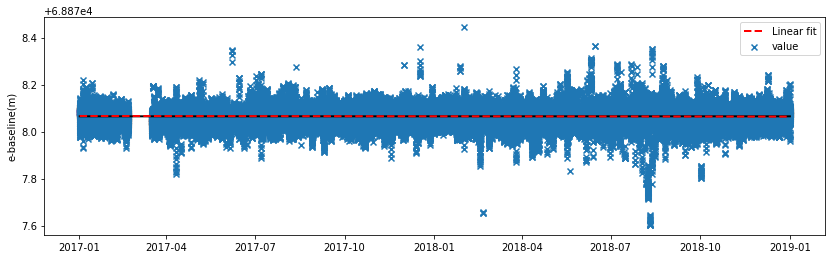

In [32]:
plt.rcParams["figure.figsize"] = (14,4)
fig_enu(df, 'e-baseline(m)')

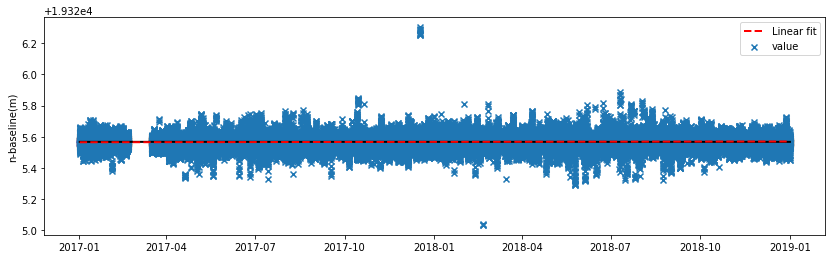

In [33]:
fig_enu(df, 'n-baseline(m)')

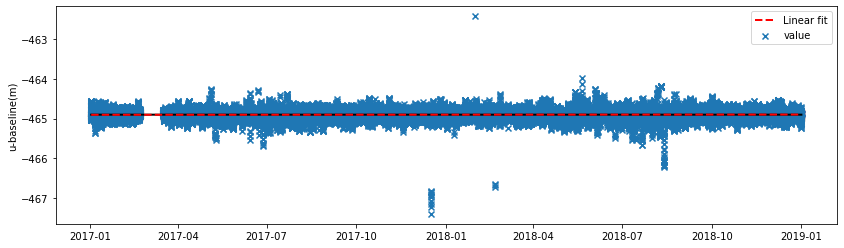

In [34]:
fig_enu(df, 'u-baseline(m)')

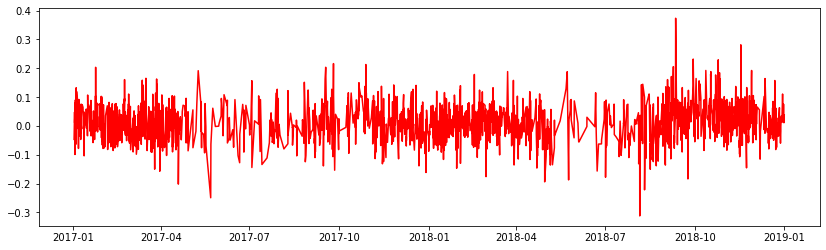

In [21]:
fig_rms('err_u')

In [20]:
wx = -0.00282075
wy = 0.00039024
wz = 0.00658441
avgcoo = np.array([[true[0]], [true[1]], [true[2]]])
euler = np.array([[0, -wz, wy],[wz, 0, -wx],[-wy, wx, 0]])

dt = np.dtype(np.float64)
dv = np.dot(euler, avgcoo)
velocity = np.array(dv, dtype = dt)
print(velocity)
#성분별 속도의 단위는 rad*m / MillionYear이므로, timeslice의 단위 또한 millionYear이 되어야 함
timeslice = np.array([18/(10000*31536000)], dtype = dt)   #단위는 백만 년, interval=1800s였으므로
print("timeslice = ", timeslice)
df['new_e'] = df['e-baseline(m)']-timeslice[0]*velocity[0,0]
df['new_n'] = df['n-baseline(m)']-timeslice[0]*velocity[1,0]
df['new_u'] = df['u-baseline(m)']-timeslice[0]*velocity[2,0]

[[-24629.78083144]
 [-10797.36714932]
 [ -9911.42558315]]
timeslice =  [5.70776256e-11]
